In [19]:
import pyvista as pv
import numpy as np

## Reading Nek files

In [20]:
filename = "./data/v6/po_premix.nek5000"
reader = pv.get_reader(filename)
time_value = 10
reader.set_active_time_value(time_value)

data = reader.read()
times = np.asarray(reader.time_values)
print(times)

[ 1.     2.001  3.001  4.001  5.     6.     7.     8.     9.    10.001
 11.001]


## Plotting

In [21]:
data.plot(scalars='Temperature', cpos='xy', interactive=True)

Widget(value='<iframe src="http://localhost:64336/index.html?ui=P_0x2a4e30460d0_10&reconnect=auto" class="pyvi…

## Filtering Data

## Extarct Isolevel

In [22]:
iso = data.contour(isosurfaces= 3, scalars="Temperature")
pl = pv.Plotter()
#pl.add_mesh(data, opacity=0.85)
pl.add_mesh(iso, color='black', line_width=3)
pl.show()

Widget(value='<iframe src="http://localhost:64336/index.html?ui=P_0x2a514705bd0_11&reconnect=auto" class="pyvi…

(np.float64(171.6366859436035),
 np.float64(174.39009323120118),
 np.float64(-20.0),
 np.float64(420.0))

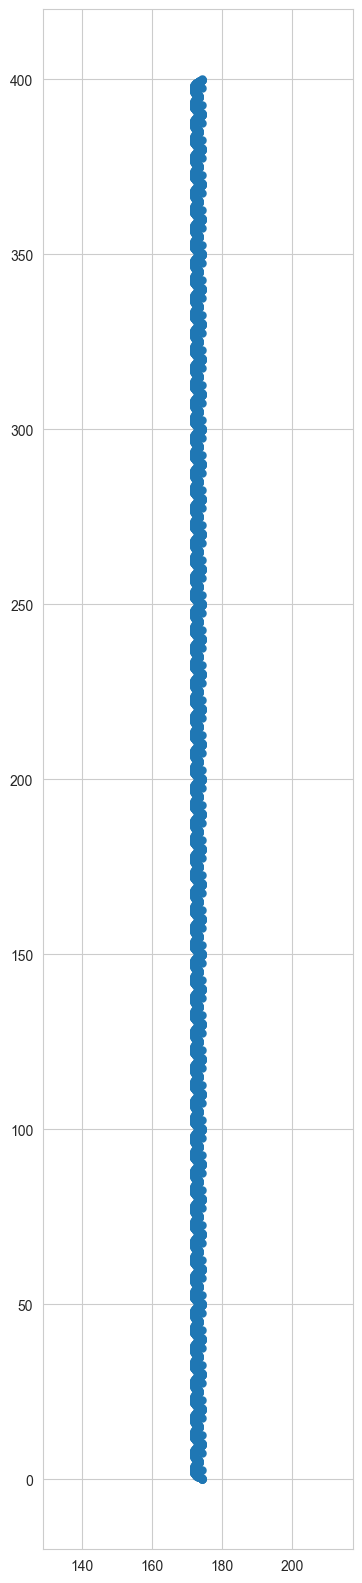

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

pts = iso.points  # shape (N, 3): columns are x, y, z

df = pd.DataFrame(pts, columns=["x", "y", "z"])
df.to_csv("isocontour_points.csv", index=False)

plt.figure(figsize= (4, 20))
plt.scatter(df["x"], df["y"],linewidths=0.1 )
plt.axis("equal")

## Computing Equivalence Ratio